# What is $R^2$?

$R^2$ Is one minus the ratio of the square of the variation in the residuals to the square of the total variation in the data set:
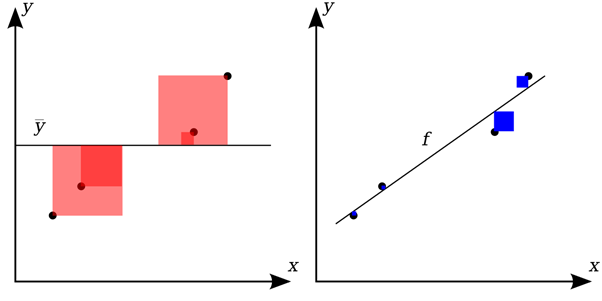


It is often used as a measure of the goodness of fit and it can work well in this situation, however it has some flaws that you should be aware of. First we just import some usefull packages and define a convience function.

In [1]:
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (6.0, 6.0)

In [2]:
def fit_and_plot(data, color=None, order = 1):
    """A helper function to fit a linear model to the data and show it's r^2 value
    """
    plt.scatter(data['x'], data['y'], c = color)
    ax = plt.gca()
    ax.axis('equal')
    ax.set_xlim(0,None)
    ax.set_ylim(0,None)
    formula = 'y ~ x' + ''.join([f' + np.power(x, {power})' for power in range(2,order)])
    result = smf.ols(formula=formula, data=data).fit()
    label = f'R^2 = {result.rsquared:.3f}'
    x_max = np.max(data['x'])
    pred_x = np.linspace(np.min(data['x']), np.max(data['x']), 200)
    pred_y = result.predict(pd.DataFrame({'x':pred_x}))
    plt.plot(pred_x, pred_y, c = color, label=label)
    plt.legend()
    return result

# How it is meant to work
Below are two examples if $R^2$ working as intended. In the first a high $R^2$ indicates that the model (the solid line) fits the data well. In the second a low $R^2$ indicated that there is a greater difference betwen the model and the actual resuls.

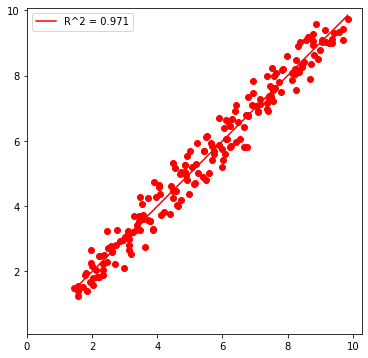

In [3]:
# high r**2 good corelation
x = np.linspace(1,9, 200)
y = x+np.random.rand(x.size)
x += np.random.rand(x.size)
data = pd.DataFrame({'x':x, 'y':y})
fit_and_plot(data, 'r')
#fig = plt.gcf()
#fig.savefig('HighR^2.png', dpi = 600)

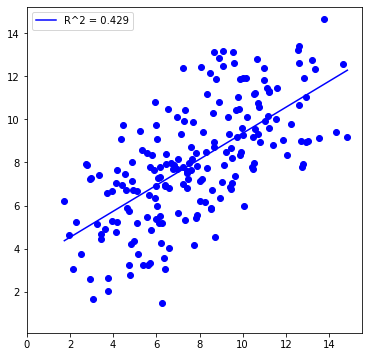

In [4]:
x = np.linspace(1,9, 200)
y = x+np.random.rand(x.size)*6
x += np.random.rand(x.size)*6
data = pd.DataFrame({'x':x, 'y':y})
fit_and_plot(data, 'b')
#fig = plt.gcf()
#fig.savefig('LowR^2.png', dpi = 600)

# What it dosn't show you.
The $R^2$ parameter is not a measure of if there are trends in your data, for example below we have trends in our data that our model is not capturing. Here $R^2$ is low, even though there are trends.

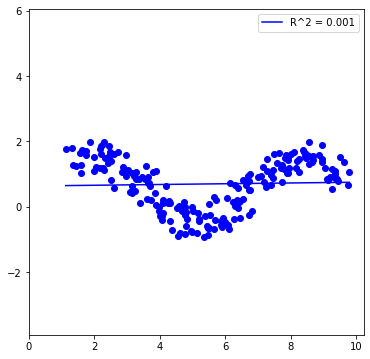

In [5]:
x = np.linspace(1,9, 200)
y = np.sin(x)+np.random.rand(x.size)
x += np.random.rand(x.size)
data = pd.DataFrame({'x':x, 'y':y})
fit_and_plot(data, 'b')
#fig = plt.gcf()
#fig.savefig('misleadingR^2-1.png', dpi = 600)

# Over fitting
$R^2$ will also not tell you when the model is over fitted to the data. Below we have fitted a model with too many degrees of freedom to our data. This has resulted in a model which gives perfect predictions for our data but would give very poor predictions for any other point. This problem is called over fitting, in this case our $R^2$ is 1 because our model perfectly fits the data. But this is a bad model. 

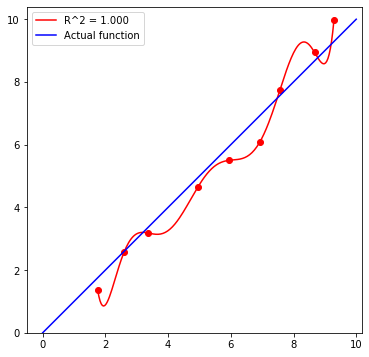

In [6]:
x = np.linspace(1,9, 9)
y = x+np.random.rand(x.size)
x += np.random.rand(x.size)
data = pd.DataFrame({'x':x, 'y':y})
results = fit_and_plot(data, 'r', 9)
plt.plot([0,10], [0,10], c='b', label='Actual function')
plt.gca().legend()
#fig = plt.gcf()
#fig.savefig('misleadingR^2-2.png', dpi = 600)

# Two groups
In the following exampels we will look at what happens when there are two groups in our data. In this example we will use a model which fits the data in each group very pooly. In effect our model will only capture variation between the groups. Here we will see that as the differences between the groups increases the $R^2$ also increases, even though within each group the model is not making good predictions.

This case can happen if you fit the same model to data generated from different wear regimes. eg on very different materials.

In [7]:
def make_data(height_diff, length=100):
    """ Makes fake data, two groups split by 20 in x and height_diff in y
    """
    x = np.random.randn(length) + 5
    y = np.random.randn(length) + 5 - x
    x[:length//2] += 20
    y[:length//2] += height_diff
    return pd.DataFrame({'x':x, 'y':y})
    

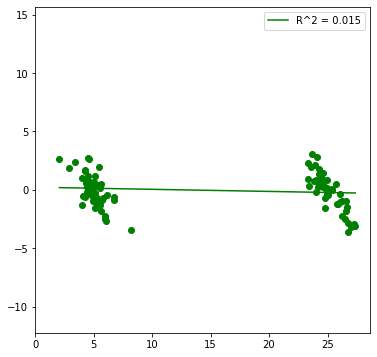

In [8]:
data = make_data(0)
result = fit_and_plot(data, 'g')
#fig = plt.gcf()
#fig.savefig('example-1-1.png', dpi = 600)

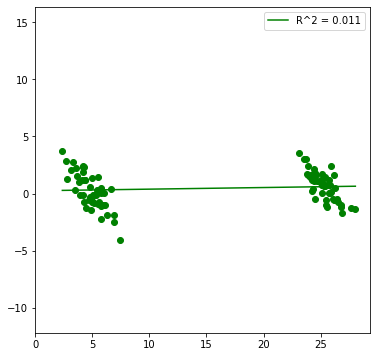

In [9]:
data = make_data(1)
result = fit_and_plot(data, 'g')
#fig = plt.gcf()
#fig.savefig('example-1-2.png', dpi = 600)

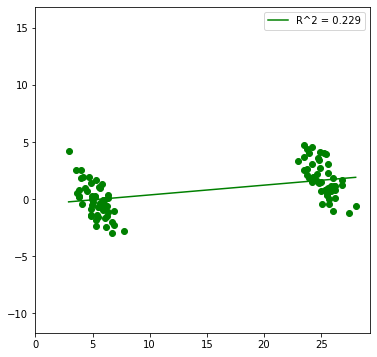

In [10]:
data = make_data(2)
result = fit_and_plot(data, 'g')
#fig = plt.gcf()
#fig.savefig('example-1-3.png', dpi = 600)

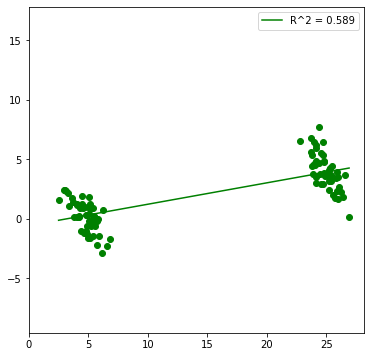

In [11]:
data = make_data(4)
result = fit_and_plot(data, 'g')
#fig = plt.gcf()
#fig.savefig('example-1-4.png', dpi = 600)

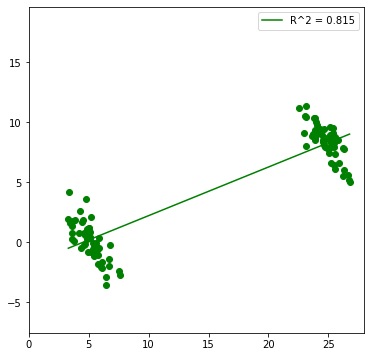

In [12]:
data = make_data(8)
result = fit_and_plot(data, 'g')
#fig = plt.gcf()
#fig.savefig('example-1-5.png', dpi = 600)

# The range problem
Next we will extend the above example to see what happens when we increase the range of a pooly fitting model. For each of the plots below the underlying function is the same:

$$ y = x + sin(x) $$

We will see that as we increase the range covered in x we achive a higher $R^2$ even though the model is not getting any better for any of the individual data points. 

In [13]:
colors = 'brgk'
to_add = 0
start_range = [-0.5*np.pi, 0.5*np.pi]
for i in range(4):
    x = np.linspace(start_range[0],start_range[1], 200) + np.random.randn(x)
    y = 0.9*x + np.cos(x)+np.random.rand(x.size)*1.5 +to_add
    data = pd.DataFrame({'x':x, 'y':y})
    fit_and_plot(data, colors[i])
    start_range=[2*sr for sr in start_range]
    to_add+=4
    ax = plt.gca()
    ax.set_xlim(-20,20)
    ax.set_ylim(-7,32)
    #ax.grid()
    #fig = plt.gcf()
    #fig.savefig(f'r^2_range_dependence{i}.png', dpi = 600)

ValueError: operands could not be broadcast together with shapes (200,) (9,) 